In [42]:
%matplotlib inline

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(0, 1, size=1000000)

In [4]:
x.mean()

0.49975173065572687

In [15]:
a = np.zeros(3)
a

array([ 0.,  0.,  0.])

In [16]:
type(a)

numpy.ndarray

In [8]:
a = np.zeros(3)
type(a[0])

In [17]:
a = np.zeros(3, dtype=int)
a

array([0, 0, 0])

In [11]:
a

array([0, 0, 0])

In [12]:
type(a[0])

numpy.int64

In [20]:
z = np.zeros(4, dtype=int)
z

array([0, 0, 0, 0])

In [22]:
z.shape = (2, 2)
z

array([[0, 0],
       [0, 0]])

In [23]:
np.linspace(2, 4, 5)


array([ 2. ,  2.5,  3. ,  3.5,  4. ])

In [24]:
z = np.identity(2)
z

array([[ 1.,  0.],
       [ 0.,  1.]])

In [33]:
z = np.array([1, 2, 3, 4, 5, 6])
z.shape = (2, 3)
z

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
z[1, 2]
z[1][2]

6

In [36]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[ 2.,  2.],
       [ 2.,  2.]])

In [37]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

In [38]:
a = np.random.randn(3)
a

array([ 1.01056031,  0.91211243,  1.01240289])

In [40]:
b = np.empty_like(a)
np.copyto(b, a)
b

array([ 1.01056031,  0.91211243,  1.01240289])

##### Exercise 1
Earlier, you wrote a simple function p(x, coeff) to evaluate (1) without considering efficiency

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop

(Such functionality is already implemented as np.poly1d, but for the sake of the exercise don’t use this class)

Hint: Use np.cumprod()

In [82]:
def p(x, coeff):
    X = np.array([x ** i for i in range(len(coeff))])
    return np.sum(X @ coeff[::-1])

In [83]:
q = np.poly1d(np.ones(3))
assert p(1, np.ones(3)) == q(1)

q = np.poly1d(np.array([3, 4, 5]))
assert p(3, np.array([3, 4, 5])) == q(3)

##### Exercise 2

In [105]:
from numpy.random import uniform

class discreteRV():
    def __init__(self, q):
        self._q = np.asarray(q)
        self.Q = np.cumsum(q)
    
    @property
    def q(self):
        return self._q
    
    @q.setter
    def q(self, val):
        self._q = np.asarray(val)
        self.Q = np.cumsum(val)

    def draw(self, k = 1):
        return self.Q.searchsorted(uniform(0, 1, size=k)) 

d = discreteRV((0.1, 0.5))
d.draw(4)

array([2, 1, 2, 0])

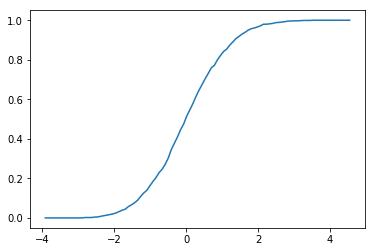

In [112]:
class ECDF(object):
    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        return np.mean(self.observations <= x)

    def plot(self):
        a = self.observations.min() - self.observations.std()
        b = self.observations.max() + self.observations.std()
        self.plotArgs(a, b)
    
    def plotArgs(self, a, b):
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()
        
X = np.random.randn(1000)
F = ECDF(X)
F.plot()